## 加载图片

In [1]:
import numpy as np

# 设置随机种子
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
from sklearn.datasets import load_sample_image

## 每个颜色通道的像素强度是0-255 除以255可以缩放数据
china = load_sample_image("china.jpg") /255
flower = load_sample_image("flower.jpg") /255
images = np.array([china, flower])
batch_size, height, width, channels = images.shape

## 创建两个滤波器

C:\Users\Administrator\anaconda3\envs\DeepLearning-py310\lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


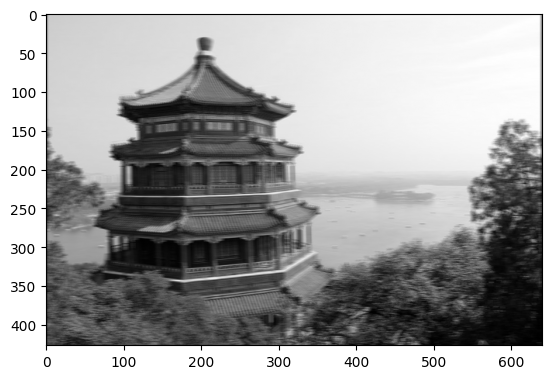

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
# 创建两个7*7的滤波器
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1 #竖直滤波器
filters[3, :, :, 1] = 1 #水平滤波器

outputs = tf.nn.conv2d(images, filters, strides=[1, 1, 1, 1], padding='SAME')
plt.imshow(outputs[0, :, :, 1], cmap='gray')
plt.show()

## 使用Keras创建

In [3]:
from tensorflow import keras
conv = keras.layers.Conv2D(filters= 32, kernel_size= 3, strides= 1, padding= "same", activation= "relu")

## 实现简单的CNN来处理fashion MNIST数据集

### 加载和处理fashion MNIST数据集

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))
train_images, test_images = train_images / 255.0, test_images / 255.0


In [6]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters= 64, activation= "relu", padding= "same", kernel_size=3,input_shape= [28, 28, 1]),
    keras.layers.MaxPooling2D(pool_size= 2),
    keras.layers.Conv2D(128, 3, activation= "relu", padding= "same"),
    keras.layers.Conv2D(128, 3, activation= "relu", padding= "same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(256, 3, activation= "relu", padding= "same"),
    keras.layers.Conv2D(256, 3, activation= "relu", padding= "same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation= "relu"),
    keras.layers.Dense(128, activation= "relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation= "relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation= "softmax")
])

model.compile(optimizer= "adam", loss= "sparse_categorical_crossentropy", metrics= ["accuracy"])
model.fit(train_images, train_labels, epochs= 10, validation_data= (test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6445 - accuracy: 0.7747 - val_loss: 0.3407 - val_accuracy: 0.8776
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3588 - accuracy: 0.8806 - val_loss: 0.3327 - val_accuracy: 0.8810
Epoch 3/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.2996 - accuracy: 0.9002 - val_loss: 0.2776 - val_accuracy: 0.9052
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2707 - accuracy: 0.9092 - val_loss: 0.2669 - val_accuracy: 0.9038
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2450 - accuracy: 0.9185 - val_loss: 0.2596 - val_accuracy: 0.9161
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2248 - accuracy: 0.9243 - val_loss: 0.2896 - val_accuracy: 0.9041
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2104 - accuracy: 0.9293 - val_loss: 0.2677 - val_accuracy: